Goal here is to merge kiwo.csv umsatz.csv wetter.csv

In [4]:
import pandas as pd

# Read CSV files
df1 = pd.read_csv('/workspaces/bakery_sales_prediction/testing/Data/kiwo.csv')
df2 = pd.read_csv('/workspaces/bakery_sales_prediction/testing/Data/wetter.csv')
df3 = pd.read_csv('/workspaces/bakery_sales_prediction/testing/Data/umsatzdaten_gekuerzt.csv')

# Merge dataframes on the date column
merged_df = pd.merge(df1, df2, on='Datum')
merged_df = pd.merge(merged_df, df3, on='Datum')

# Display merged dataframe
print(merged_df.head(10))


        Datum  KielerWoche  Bewoelkung  Temperatur  Windgeschwindigkeit  \
0  2014-06-21            1         6.0     15.5125                   18   
1  2014-06-21            1         6.0     15.5125                   18   
2  2014-06-21            1         6.0     15.5125                   18   
3  2014-06-21            1         6.0     15.5125                   18   
4  2014-06-21            1         6.0     15.5125                   18   
5  2014-06-22            1         5.0     15.7000                   19   
6  2014-06-22            1         5.0     15.7000                   19   
7  2014-06-22            1         5.0     15.7000                   19   
8  2014-06-22            1         5.0     15.7000                   19   
9  2014-06-22            1         5.0     15.7000                   19   

   Wettercode  Warengruppe      Umsatz  
0        61.0            1  162.410673  
1        61.0            2  691.302130  
2        61.0            3  266.758834  
3        6

The plan now is to show earnings depending on temperature 

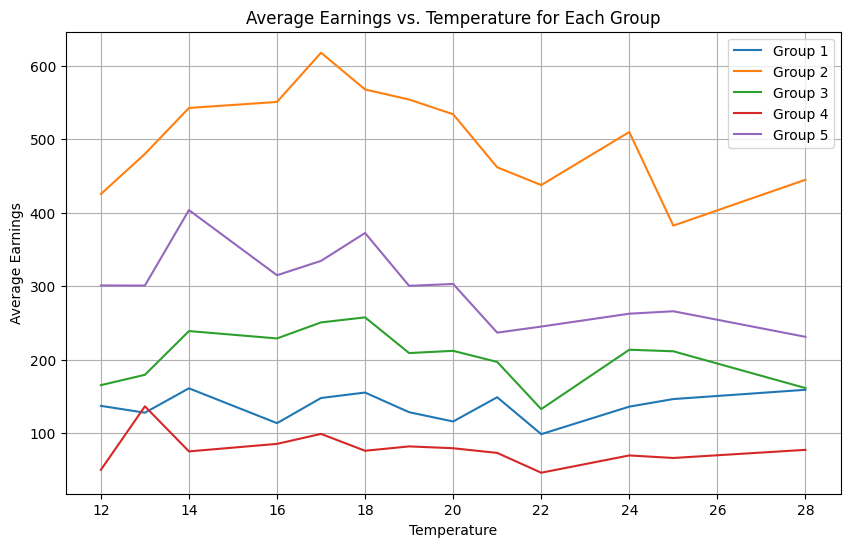

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_group_earnings(df):
    # Round temperature to the nearest integer
    df['Temperature_Rounded'] = df['Temperatur'].round().astype(int)

    # Group by rounded temperature and Warengruppe (item group), calculate average earnings
    grouped_df = df.groupby(['Temperature_Rounded', 'Warengruppe'])['Umsatz'].mean().reset_index()

    # Get unique item groups
    groups = grouped_df['Warengruppe'].unique()

    # Plot line graph for each group of items
    plt.figure(figsize=(10, 6))
    for group in groups:
        group_data = grouped_df[grouped_df['Warengruppe'] == group]
        if not group_data.empty:
            plt.plot(group_data['Temperature_Rounded'], group_data['Umsatz'], label=f'Group {group}')

    plt.xlabel('Temperature')
    plt.ylabel('Average Earnings')
    plt.title('Average Earnings vs. Temperature for Each Group')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming merged_df is the resulting dataframe you provided
visualize_group_earnings(merged_df)


weirdly i lost graph 6 here somehow

In [6]:
import pandas as pd

def calculate_monthly_earnings(df):
    # Convert 'Datum' column to datetime
    df['Datum'] = pd.to_datetime(df['Datum'])
    
    # Extract year and month from the 'Datum' column
    df['Year'] = df['Datum'].dt.year
    df['Month'] = df['Datum'].dt.month
    
    # Group by year and month, and calculate total earnings for each month
    monthly_earnings = df.groupby(['Year', 'Month'])['Umsatz'].sum()
    
    # Format the index as Year-Month
    monthly_earnings.index = [f"{year}-{month:02d}" for year, month in monthly_earnings.index]
    
    return monthly_earnings

# Assuming merged_df is the dataframe provided
monthly_earnings = calculate_monthly_earnings(merged_df)
print(monthly_earnings)


2014-06    13366.119546
2015-06    11240.764784
2016-06    10663.903016
2017-06    11031.995421
2018-06    11801.923132
Name: Umsatz, dtype: float64
